In [2]:
from startup import *

Pixiedust database opened successfully


Pixiedust will not collect anonymous install statistics.


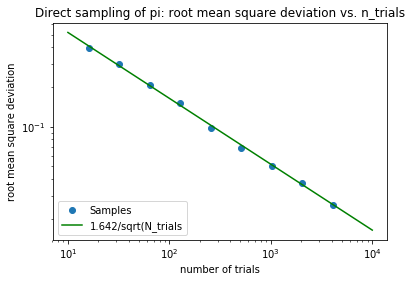

In [7]:
import random, math, pylab
 
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits
 
n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot(n_trials_list, sigmasqs, 'o',label='Samples')
pylab.plot([10.0, 10000.0], [1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)],'g-',label='1.642/sqrt(N_trials')
pylab.xscale('log')
pylab.yscale('log')
pylab.legend(loc='lower left')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
#pylab.savefig('direct_sampling_rms_deviation.png')
pylab.show()


In [19]:
#%%pixie_debugger
from tqdm import tqdm #trange or tqdm()

list_hits=zeros((100,40000))
#i=30
for i in tqdm(range(100)):
    for j in range(40000):

        list_hits[i][j] =direct_pi(i)

set=[mean(list_hits,1),std(list_hits,1)]# N_trials: i  
    

100%|██████████| 100/100 [05:38<00:00,  6.48s/it]


In [20]:
pd.DataFrame(set,index=["mean","std"])

0         1        2         3         4        5         6         7   \
mean  0.0  0.783650  1.57305  2.361800  3.146925  3.92640  4.708575  5.503450   
std   0.0  0.411756  0.58083  0.709719  0.817764  0.91923  1.003268  1.084315   

            8         9     ...             90        91         92  \
mean  6.286200  7.067875    ...      70.681950  71.43895  72.233050   
std   1.164534  1.234086    ...       3.876673   3.92463   3.929229   

             93         94         95         96         97         98  \
mean  73.021550  73.861475  74.600700  75.406850  76.187225  76.987150   
std    3.947244   3.982855   4.027693   4.029922   4.031727   4.078772   

             99  
mean  77.740000  
std    4.095705  

[2 rows x 100 columns]

In [47]:
[set[0][30],set[1][30]]

[23.583100000000002, 2.2548269090996764]

In [46]:
math.pi/4*30

23.561944901923447

In [45]:
math.sqrt(math.pi/4*(1-math.pi/4)*30)

2.2486521851724652

In [52]:
1.642 / math.sqrt(30.0)

0.2997868131411609

In [53]:
math.sqrt(math.pi/4*(1-math.pi/4)/30)*4

0.29982029135632865

In [54]:
4*math.sqrt(math.pi/4*(1-math.pi/4))

1.642183367736324

In [55]:
math.sqrt(math.pi/4*(1-math.pi/4)*100)

4.10545841934081